In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
from pickle import load
import pickle

## First, lets load Cpx data

In [4]:
with open(r'../Combo_Cpx.pkl', 'rb') as f:
            All_Cpx=load(f)
GVB_Cpx=All_Cpx.loc[All_Cpx['Volcano']=="GVB"]
GVB_Cpx['Sample_ID_Cpx']="GVB"

C:\Users\penny\AppData\Local\Temp\ipykernel_5800\2983846054.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GVB_Cpx['Sample_ID_Cpx']="GVB"


In [5]:
len(GVB_Cpx)

15

In [6]:
print(len(GVB_Cpx))
WangCopy=GVB_Cpx.copy()
WangCopy['Preferred_P']=WangCopy['P_Wang21_eq1']
WangCopy['Model']="Wang"
JorgensonCopy=GVB_Cpx.copy()
JorgensonCopy['Preferred_P']=JorgensonCopy['P_Jorgenson22']
JorgensonCopy['Model']="Jorgenson"

Combo_Cpx=pd.concat([WangCopy, JorgensonCopy], axis=0)

15


## Choose Crustal density

In [7]:
rho=2700
P_axis_min=-3
P_axis_max=12
D_axis_min=100000*P_axis_min/(9.8*rho)
D_axis_max=100000*P_axis_max/(9.8*rho)


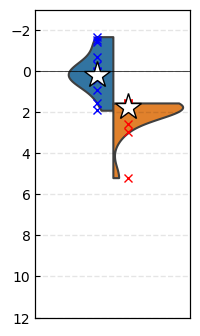

In [8]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()
# ticks = [40.540139,41.3099, 41.6108, 42.9446, 43.7221, 44.103449, 44.6743, 45.3736, 46.1914, 46.8523, 48.1119, 48.7767]
# labels = ['GVB', 'GVB', 'Med Lake', 'Crater Lake', 'Newberry', '3 Sisters', 'Mt. Jeff', 'Mt. GVB', 'GVB', 'Rainier', 'Glac. Pk.', 'Mt. Baker']
# ax2.set_xticks(ticks, minor=False)
# ax2.set_xticklabels(labels, fontdict=None, minor=False, rotation=90)
#ax1.set_xlim([40, 49])
volc_order=["GVB"]
sns.violinplot(x="Sample_ID_Cpx", y="Preferred_P",  cut=0,  inner=None, hue="Model",
            data=Combo_Cpx, split=True, ax=ax1, width=0.9, order=volc_order, stick=True)

ax1.plot(-0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="GVB")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="GVB")],  
         'xb')

ax1.plot(0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="GVB")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="GVB")],  
         'xr')

ax1.plot(-0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="GVB")]),  
         '*k', mfc='w', ms=20)

ax1.plot(0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="GVB")]),  
         '*k', mfc='w', ms=20)

ax1.plot(0.9+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="GVB")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="GVB")],  
         'xb')

ax1.plot(1.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="GVB")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="GVB")],  
         'xr')

ax1.plot(0.9,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="GVB")]),  
         '*k', mfc='w', ms=20)

ax1.plot(1.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="GVB")]),  
         '*k', mfc='w', ms=20)

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.5, 0.5])
ax1.get_legend().remove()
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax2.set_yticks([])
ax1.set_xticks([])
fig.savefig('GVB_Cpx.png', dpi=200)

In [13]:
 np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")])

0.19415537871310562

In [14]:
 np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")])

1.7594626865671639

In [8]:
len(Combo_Cpx)

30

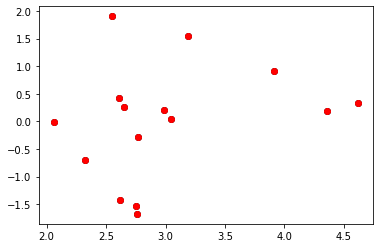

In [13]:
cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=GVB_cpx_filt).reset_index(drop=True)

plt.plot(cpx_comps['Al2O3_Cpx'].loc[cpx_comps["Sample_ID_Cpx"]=="GVB"]                         
        , GVB_cpx_Press_All['P_Wang21_eq1'].loc[GVB_cpx_Press_All["Sample_ID_Cpx"]=="GVB"]
         , 'ok')

plt.plot(cpx_comps['Al2O3_Cpx'].loc[cpx_comps["Sample_ID_Cpx"]=="GVB"]                         
, GVB_cpx_Press_All['P_Wang21_eq1'].loc[GVB_cpx_Press_All["Sample_ID_Cpx"]=="GVB"]
         , 'or')

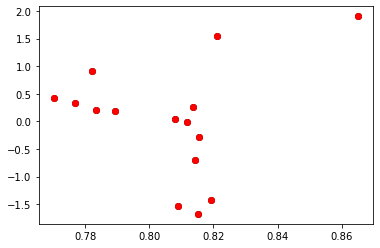

In [16]:
cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=GVB_cpx_filt)

plt.plot(cpx_comps['Mgno_Cpx'].loc[cpx_comps["Sample_ID_Cpx"]=="GVB"]                         
        , GVB_cpx_Press_All['P_Wang21_eq1'].loc[GVB_cpx_Press_All["Sample_ID_Cpx"]=="GVB"]
         , 'ok')

plt.plot(cpx_comps['Mgno_Cpx'].loc[cpx_comps["Sample_ID_Cpx"]=="GVB"]                         
, GVB_cpx_Press_All['P_Wang21_eq1'].loc[GVB_cpx_Press_All["Sample_ID_Cpx"]=="GVB"]
         , 'or')

In [ ]:
## Load in LP data

In [17]:
LPs=pd.read_excel(r'C:\Users\penny\OneDrive - Oregon State University\Postdoc\Compilations\Geophysics_Jan2021.xlsx',
                  sheet_name="LPEarthquakes")
LPs_GVB=LPs.loc[LPs['Volcano']=="Mount Saint Helens"]
LPs_GVB.head()

,Volcano,Latitude,Depth,Depth definition,Reference,Unnamed: 5,Unnamed: 6
71,Mount Saint Helens,46.1914,25.493827,"presume below surface, as none at + depths",Nichols et al. 2011,NaN,NaN
72,Mount Saint Helens,46.1914,27.384259,"presume below surface, as none at + depths",Nichols et al. 2011,NaN,NaN
73,Mount Saint Helens,46.1914,27.492284,"presume below surface, as none at + depths",Nichols et al. 2011,NaN,NaN
74,Mount Saint Helens,46.1914,29.166667,"presume below surface, as none at + depths",Nichols et al. 2011,NaN,NaN
75,Mount Saint Helens,46.1914,24.845679,"presume below surface, as none at + depths",Nichols et al. 2011,NaN,NaN


## Raw template for geophysics and Exp Pet

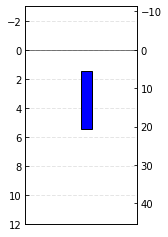

In [22]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()
from matplotlib import patches
elev=2.549 # Elevation of MSH in Km
mean_elev=elev-1.300 # Mean station elevation

sep=0.5
### SEISMIC CONSTRAINTS

################################### GEODETIC EVIDENCE

# Lisowski et al. GPS best fit, says 7.9 km from mean height of the volcano



## Magnetotelluric data 
# Hill et al. (2009)
rect_H1 = patches.Rectangle((10*sep,3+elev),0.2,25-10,linewidth=1,
                            edgecolor='k',facecolor='blue', alpha=1)
ax2.add_patch(rect_H1)

ax1.plot([-1, 8], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.set_xlim([4, 6])
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_xticks([])
#ax1.set_xticklabels(['Exp Pet', 'Exp Pet', 'MT', 'Seismics'], rotation=90)
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
                 
fig.savefig('Geophysical+Other_GVB.png', dpi=200, bbox_inches="tight")

In [20]:
GVB_Input_Amp

NameError: name 'Lassen_Input_Amp' is not defined

In [9]:
## Same for amphibole

GVB_read_Amp=pt.import_excel('GVB.xlsx', sheet_name='Amp_All')
GVB_Input_Amp=GVB_read_Amp['my_input']
GVB_Amp=GVB_read_Amp['Amps']
GVB_Amp['Sample_ID_Amp']='GVB'
GVB_Amp_copy=GVB_Amp.copy()
GVB_Amp_comps=pt.get_amp_sites_from_input(amp_comps=GVB_Amp)
# Are a few outside 3.95 to 4.05 Cat sums, CaCaMgFe lies 0.3 - 0.55
GVB_Amp_filt1=GVB_Amp.loc[( (GVB_Amp_comps['cation_sum_All'].between(15, 16)) )]
GVB_Amp_class=pt.classify_phases(df=GVB_Amp_filt1, return_end_members=True,
                        str_to_drop='_Amp')
print(GVB_Amp_class['Phase_Min_Group_ML'].unique())
GVB_Amp_filt=GVB_Amp_filt1.loc[GVB_Amp_class['Phase_Min_Group_ML']=="Amp"].reset_index(drop=True)
GVB_Amp_Press_NoFilter=pt.calculate_amp_only_press(amp_comps=GVB_Amp_filt, 
                        Ridolfi_Filter=False, equationP="P_Ridolfi2021")
GVB_Amp_Press_Filter=pt.calculate_amp_only_press(amp_comps=GVB_Amp_filt, 
                        Ridolfi_Filter=True, equationP="P_Ridolfi2021")


C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SVC from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


['Px' 'Amp']


In [10]:
len(GVB_Amp_Press_NoFilter)

43

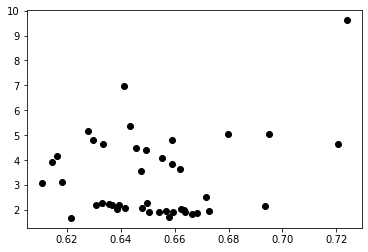

In [11]:
plt.plot(
         (GVB_Amp_filt['MgO_Amp']/40.3044)/(GVB_Amp_filt['MgO_Amp']/40.3044+GVB_Amp_filt['FeOt_Amp']/71.844),
    GVB_Amp_Press_NoFilter['P_kbar_calc'], 'ok')

In [12]:
Amp_Chem=pt.calculate_amp_only_melt_comps(amp_comps=GVB_Amp_filt)

c:\users\penny\onedrive - oregon state university\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\amphibole.py:229: UserWarning: You must enter a value for T in Kelvin to get results from equation3 and 5 from Zhang, and SiO2 from Putrka (2016)
  w.warn('You must enter a value for T in Kelvin to get results from equation3 and 5 from Zhang, and SiO2 from Putrka (2016)')


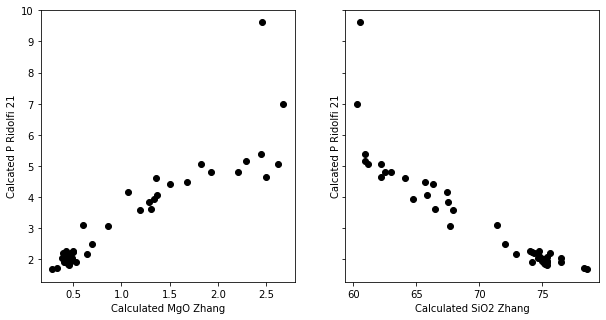

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ax1.plot(
         Amp_Chem['MgO_Eq9_Zhang17'],
    GVB_Amp_Press_NoFilter['P_kbar_calc'], 'ok')
ax1.set_xlabel('Calculated MgO Zhang')
ax1.set_ylabel('Calcated P Ridolfi 21')

ax2.set_xlabel('Calculated SiO2 Zhang')
ax2.set_ylabel('Calcated P Ridolfi 21')

ax2.plot(
         Amp_Chem['SiO2_Eq1_Zhang17'],
    GVB_Amp_Press_NoFilter['P_kbar_calc'], 'ok')

In [14]:
#None Filtered
GVB_Amp_Press_All=GVB_Amp_Press_NoFilter.copy()
GVB_Amp_Press_All['Preferred_P']=GVB_Amp_Press_All['P_kbar_calc']
GVB_Amp_Press_All['Model']="Ridolfi not filtered"
GVB_Amp_Press_All['Sample_ID_Amp']="GVB"

GVB_Amp_Press_Filt=GVB_Amp_Press_Filter.copy()
GVB_Amp_Press_Filt['Preferred_P']=GVB_Amp_Press_Filt['P_kbar_calc']
GVB_Amp_Press_Filt['Model']="Ridolfi filtered"
GVB_Amp_Press_Filt['Sample_ID_Amp']="GVB"

Combo_Amp=pd.concat([GVB_Amp_Press_All, GVB_Amp_Press_Filt], axis=0)

In [25]:
import pickle
Combo_Amp.to_pickle("Amp_GVB.pkl") 
Combo_Cpx.to_pickle("Cpx_GVB.pkl")

In [15]:
GVB_Amp_Press_All['Sample_ID_Amp']

0     Adams
1     Adams
2     Adams
3     Adams
4     Adams
5     Adams
6     Adams
7     Adams
8     Adams
9     Adams
10    Adams
11    Adams
12    Adams
13    Adams
14    Adams
15    Adams
16    Adams
17    Adams
18    Adams
19    Adams
20    Adams
21    Adams
22    Adams
23    Adams
24    Adams
25    Adams
26    Adams
27    Adams
28    Adams
29    Adams
30    Adams
31    Adams
32    Adams
33    Adams
34    Adams
35    Adams
36    Adams
37    Adams
38    Adams
39    Adams
40    Adams
41    Adams
42    Adams
Name: Sample_ID_Amp, dtype: object

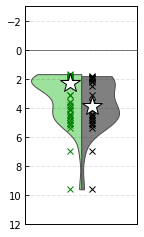

In [17]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()

volc_order=['' 'GVB']
sns.violinplot(x="Sample_ID_Amp", y="Preferred_P",  cut=0, 
               linewidth=1,hue="Model", inner=None,
            data=Combo_Amp, split=True, ax=ax1, width=0.9, order=volc_order, stick=True
              , palette=['lightgreen', 'grey'])

# ax1.plot(-0.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="GVB")],
#       Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="GVB")],  
#          'xb')

# ax1.plot(0.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="GVB")],
#       Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="GVB")],  
#          'xr')

# ax1.plot(-0.1,
#       np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="GVB")]),  
#          '*k', mfc='w', ms=20)

# ax1.plot(0.1,
#       np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="GVB")]),  
#          '*k', mfc='w', ms=20)

ax1.plot(-0.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="GVB")],
      Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="GVB")],  
         'x', mec='green')

ax1.plot(0.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="GVB")],
      Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="GVB")],  
         'x', mec='k')

ax1.plot(-0.1,
      np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="GVB")]),  
         '*k', mfc='w', ms=20)

ax1.plot(0.1,
      np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="GVB")]),  
         '*k', mfc='w', ms=20)

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.5, 0.5])
ax1.get_legend().remove()
ax1.set_xlabel(None)
ax1.set_ylabel(None)

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax2.set_yticks([])
ax1.set_xticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)


fig.savefig('GVB_Amp.png', dpi=200)



In [15]:
GVB_Amp_Press_Filter

,P_kbar_calc,Input_Check,Fail Msg,classification,equation,H2O_calc,Fe2O3_calc,FeO_calc,Total_recalc,Sum_input,...,Fe2_calc,"O=F,Cl",Total,Mgno_Fe2,Mgno_FeT,Na_calc,B_Sum,A_Sum,class,APE
0,NaN,False,Low B Cations,low-Ca,1b,2.012261,17.077683,-0.832717,101.195227,97.472,...,-0.097917,-0.0,NaN,1.033386,0.639432,0.401017,1.841064,0.000000,N/A,7.432205
1,NaN,False,Low B Cations,low-Ca,1b,1.984768,16.698011,-0.154084,100.387695,96.730,...,-0.018369,-0.0,NaN,1.006445,0.618049,0.470695,1.937105,0.000000,N/A,30.946667
2,NaN,False,Low B Cations,low-Ca,1b,1.999921,15.305930,0.865529,100.867380,97.334,...,0.102404,-0.0,NaN,0.966529,0.630651,0.423789,1.911677,0.000000,N/A,0.160361
3,NaN,False,Low B Cations,low-Ca,1b,2.008069,16.567178,-0.236358,101.294889,97.627,...,-0.027851,-0.0,NaN,1.009270,0.636898,0.425075,1.912511,0.000000,N/A,6.052241
4,NaN,False,Low B Cations,Mg-Hornblende,1b,1.976008,14.051738,1.627067,99.874813,96.491,...,0.194833,-0.0,NaN,0.938000,0.633013,0.460011,1.973883,0.000000,N/A,7.369954
5,NaN,False,Low B Cations,low-Ca,1b,2.003058,15.783018,-0.183761,100.860315,97.276,...,-0.021707,-0.0,NaN,1.007117,0.649748,0.432985,1.930045,0.000000,N/A,7.088655
6,4.170537,True,,Tschermakitic pargasite,1c,1.969818,13.176346,2.282756,100.162920,96.873,...,0.274208,-0.0,NaN,0.908684,0.616358,0.471060,2.000000,0.063917,N/A,0.191792
7,NaN,False,Low B Cations,Mg-Hornblende,1b,2.004432,14.412905,1.027084,101.006421,97.558,...,0.121244,-0.0,NaN,0.961648,0.647893,0.432414,1.943269,0.000000,N/A,0.462301
8,NaN,False,Low B Cations,Mg-Hornblende,1b,2.004971,14.804366,1.079843,101.089179,97.601,...,0.127438,-0.0,NaN,0.959306,0.638679,0.392625,1.909878,0.000000,N/A,11.592936
9,NaN,False,Low B Cations,Mg-Hornblende,1b,1.996078,14.465558,1.254706,100.867342,97.422,...,0.148734,-0.0,NaN,0.953200,0.641670,0.455661,1.983622,0.000000,N/A,6.168166


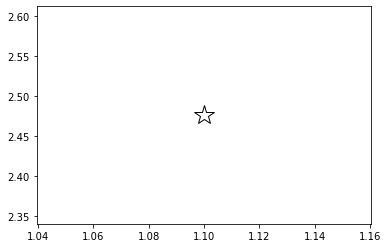

In [26]:
plt.plot(1.1,
      np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="GVB")]),  
         '*k', mfc='w', ms=20)

In [25]:
Combo_Amp["Sample_ID_Amp"]

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
             ...       
537    Lassen domefield
538    Lassen domefield
539    Lassen domefield
540    Lassen domefield
541    Lassen domefield
Name: Sample_ID_Amp, Length: 2168, dtype: object

In [24]:
Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="GVB")]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
537   NaN
538   NaN
539   NaN
540   NaN
541   NaN
Name: Preferred_P, Length: 542, dtype: float64